In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data import fetch_yfinance_data


stock = "OKYO"
daily_df, minute_df = fetch_yfinance_data(stock, "2025-06-21")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

2025-06-20 07:40:00 2025-06-20 19:52:00


In [ ]:
import pandas as pd
minute_df['plot_date'] = pd.to_datetime(minute_df['date']).dt.tz_localize(None)
# print(minute_df.head())
# Filter for June 20th only
start_date = pd.to_datetime("2025-06-19").date()
end_date = pd.to_datetime("2025-06-20").date()
# print(target_date)
mask = (minute_df['plot_date'].dt.date >= start_date) & (minute_df['plot_date'].dt.date <= end_date)
day_df = minute_df[mask]
print(day_df['plot_date'].min(), day_df['plot_date'].max())

day_df.head()


Price,date,open,high,low,close,volume,averageWAP,barCount,plot_date
Ticker,,OKYO,OKYO,OKYO,OKYO,OKYO,,,
376,2025-06-20 07:40:00-04:00,2.3200,2.3200,2.32,2.3200,0,None,None,2025-06-20 07:40:00
377,2025-06-20 08:00:00-04:00,2.4798,2.7500,2.45,2.6200,0,None,None,2025-06-20 08:00:00
378,2025-06-20 08:01:00-04:00,2.6098,2.9900,2.50,2.5001,0,None,None,2025-06-20 08:01:00
379,2025-06-20 08:02:00-04:00,2.5400,2.6300,2.50,2.6100,0,None,None,2025-06-20 08:02:00
380,2025-06-20 08:03:00-04:00,2.6000,2.6191,2.55,2.5700,0,None,None,2025-06-20 08:03:00


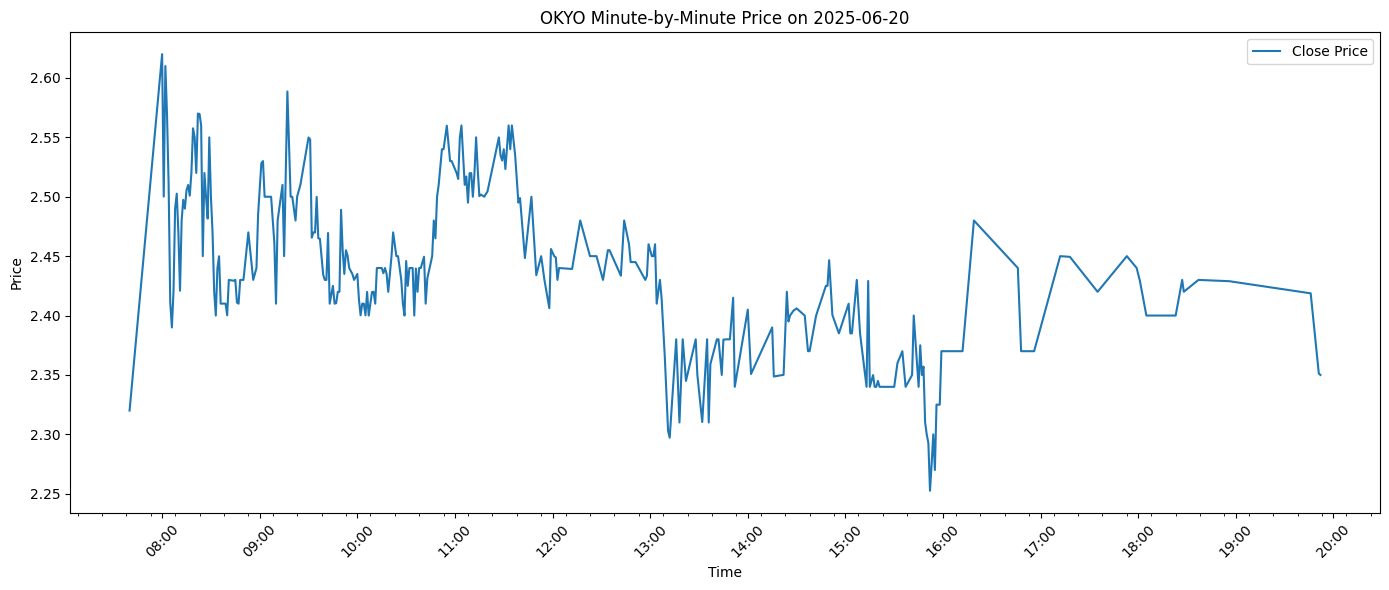

In [3]:

plt.figure(figsize=(14, 6))
plt.plot(day_df['plot_date'], day_df['close'], label='Close Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f"{stock} Minute-by-Minute Price on 2025-06-20")

# Format x-axis for time of day
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [28]:
print(day_df['plot_date'].min(), day_df['plot_date'].max())

2025-06-20 09:30:00 2025-06-20 15:59:00
